# 퍼셉트론 실습

In [1]:
import numpy as np

# 입력층
input_data = np.array([[2,3], [5,1]])
print(input_data)
x = input_data.reshape(-1)# 이코드로 인해 2행렬이 1로 변함
print(x)

[[2 3]
 [5 1]]
[2 3 5 1]


In [2]:
# 가중치 및 편향
w1 = np.array([2,1,-3,3])
w2 = np.array([1,-3,1,3])
b1 = 3
b2 = 3

In [3]:
# 가중합
W = np.array([w1, w2])
print(W)
b = np.array([b1, b2])
print(b)
weight_sum = np.dot(W, x) + b
print(weight_sum)

[[ 2  1 -3  3]
 [ 1 -3  1  3]]
[3 3]
[-2  4]


In [4]:
# 출력층
res = 1/(1+np.exp(-weight_sum))
print(res)

[0.11920292 0.98201379]


# 딥러닝 분류실습

In [5]:
# 랜덤 시드 설정
import numpy as np
import pandas as pd
import tensorflow as tf


np.random.seed(0)
tf.random.set_seed(0)

2022-11-25 15:15:16.119319: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
df = pd.read_csv("wine_data.csv")
df

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [8]:
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [9]:
# 피쳐, 타겟 데이터 지정
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [10]:
X

,Alcohol,Malic,Ash,Alcalinity,Magesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: class, Length: 178, dtype: int64

In [12]:
# 피쳐 데이터 차원 확인
print(X.shape)

(178, 13)


In [13]:
# 타겟 데이터 종류 확인
print(set(y))

{0, 1, 2}


In [14]:
# 타겟 데이터 원-핫 인코딩
from tensorflow.keras.utils import to_categorical
y_hot = to_categorical(y) #1hot 인코딩
print(y_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [15]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y_hot, random_state=0)

In [16]:
# 신경망 생성
from tensorflow.keras.models import Sequential #층을 쌓은것
from tensorflow.keras.layers import Dense # layer
from tensorflow.keras.layers import BatchNormalization #평균0 분산1로
from tensorflow.keras.layers import Activation # 활성화

n_feat = X_tn.shape[1]
n_class = len(set(y))
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_class))
model.add(Activation('softmax'))

2022-11-25 15:21:03.755183: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# 신경망 모형 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 423
Trainable params: 383
Non-trainable params: 40
_________________________________________________________

In [18]:
# 모형 컴파일
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [19]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
27/27 [==============================] - 1s 10ms/step - loss: 1.5932 - accuracy: 0.3534
Epoch 2/30
27/27 [==============================] - 0s 5ms/step - loss: 1.2878 - accuracy: 0.3008
Epoch 3/30
27/27 [==============================] - 0s 5ms/step - loss: 1.0540 - accuracy: 0.3985
Epoch 4/30
27/27 [==============================] - 0s 4ms/step - loss: 0.9337 - accuracy: 0.4737
Epoch 5/30
27/27 [==============================] - 0s 4ms/step - loss: 0.7853 - accuracy: 0.6466
Epoch 6/30
27/27 [==============================] - 0s 9ms/step - loss: 0.7893 - accuracy: 0.6165
Epoch 7/30
27/27 [==============================] - 0s 17ms/step - loss: 0.8105 - accuracy: 0.6241
Epoch 8/30
27/27 [==============================] - 0s 16ms/step - loss: 0.7953 - accuracy: 0.6090
Epoch 9/30
27/27 [==============================] - 0s 5ms/step - loss: 0.7941 - accuracy: 0.6391
Epoch 10/30
27/27 [==============================] - 0s 8ms/step - loss: 0.7460 - accuracy: 0.6015
Epoch 11/30
27/2

In [20]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.9023
0.902255654335022


In [21]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8667
0.8666666746139526


In [22]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [23]:
accuracy = hist.history['accuracy'] 
print(accuracy)

[0.35338345170021057, 0.30075186491012573, 0.39849624037742615, 0.4736842215061188, 0.646616518497467, 0.61654132604599, 0.6240601539611816, 0.6090225577354431, 0.6390977501869202, 0.6015037298202515, 0.6992481350898743, 0.646616518497467, 0.6992481350898743, 0.6917293071746826, 0.7518796920776367, 0.7518796920776367, 0.7744361162185669, 0.7819548845291138, 0.6691729426383972, 0.7744361162185669, 0.7819548845291138, 0.7819548845291138, 0.8270676732063293, 0.7744361162185669, 0.8345864415168762, 0.8195488452911377, 0.8571428656578064, 0.8045112490653992, 0.8045112490653992, 0.8421052694320679]


In [24]:
loss = hist.history['loss'] 
print(loss)

[1.5931929349899292, 1.287818431854248, 1.053978681564331, 0.9336861371994019, 0.7853342294692993, 0.789280891418457, 0.8104835748672485, 0.7952806353569031, 0.794082760810852, 0.7460014820098877, 0.7220538258552551, 0.6997637748718262, 0.6848369836807251, 0.7153772711753845, 0.6483469009399414, 0.6410326361656189, 0.6430399417877197, 0.6408509612083435, 0.7642350196838379, 0.6027088761329651, 0.5621500015258789, 0.5899845361709595, 0.5200089812278748, 0.5866252779960632, 0.5298789143562317, 0.5214993357658386, 0.42811790108680725, 0.475136399269104, 0.47013992071151733, 0.46754494309425354]


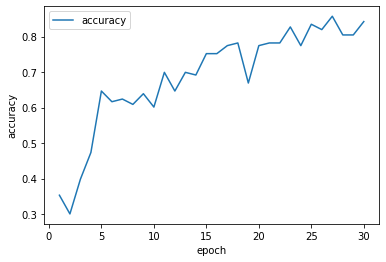

In [27]:
# 정확도 학습 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label='accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

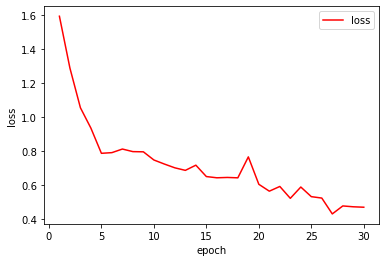

In [28]:
# 손실 그래프
import matplotlib.pyplot as plt

plt.plot(epoch, loss,'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
# 랜덤 시드 설정
import numpy as np
import pandas as pd
import tensorflow as tf


np.random.seed(0)
tf.random.set_seed(0)

In [32]:
df = pd.read_csv("boston_house_prices.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [34]:
# 피쳐, 타겟 데이터 지정
X = df.iloc[:, 0:13]
y = df.iloc[:, 13]

In [35]:
y


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [36]:
# 피쳐 데이터 차원 확인
print(X.shape)

(506, 13)


In [37]:
# 타겟 데이터 종류 확인
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [38]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te=train_test_split(X, y, random_state=0)

In [39]:
# 신경망 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_feat = X_tn.shape[1]
epo = 30

model = Sequential()
model.add(Dense(20, input_dim=n_feat, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [40]:
# 모형 컴파일
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error'])# 손실값이 중요

In [41]:
# 신경망 학습
hist = model.fit(X_tn, y_tn, epochs=epo, batch_size=5)

Epoch 1/30
76/76 [==============================] - 1s 3ms/step - loss: 4880.0889 - mean_squared_error: 4880.0889
Epoch 2/30
76/76 [==============================] - 0s 4ms/step - loss: 1025.6699 - mean_squared_error: 1025.6699
Epoch 3/30
76/76 [==============================] - 0s 3ms/step - loss: 499.7961 - mean_squared_error: 499.7961
Epoch 4/30
76/76 [==============================] - 0s 3ms/step - loss: 345.2918 - mean_squared_error: 345.2918
Epoch 5/30
76/76 [==============================] - 0s 3ms/step - loss: 263.1917 - mean_squared_error: 263.1917
Epoch 6/30
76/76 [==============================] - 0s 5ms/step - loss: 209.1592 - mean_squared_error: 209.1592
Epoch 7/30
76/76 [==============================] - 0s 4ms/step - loss: 170.5897 - mean_squared_error: 170.5897
Epoch 8/30
76/76 [==============================] - 0s 3ms/step - loss: 143.6226 - mean_squared_error: 143.6226
Epoch 9/30
76/76 [==============================] - 0s 2ms/step - loss: 121.6090 - mean_squared_erro

In [42]:
# 트레이닝 데이터 평가
print(model.evaluate(X_tn, y_tn)[1])

12/12 [==============================] - 0s 3ms/step - loss: 42.8355 - mean_squared_error: 42.8355
42.835533142089844


In [43]:
# 테스트 데이터 평가
print(model.evaluate(X_te, y_te)[1])

4/4 [==============================] - 0s 5ms/step - loss: 69.9756 - mean_squared_error: 69.9756
69.97563934326172


In [44]:
import numpy as np
epoch = np.arange(1,epo+1)
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [45]:
mse = hist.history['mean_squared_error'] 
print(mse)

[4880.0888671875, 1025.669921875, 499.7960510253906, 345.2918395996094, 263.19171142578125, 209.1591796875, 170.58969116210938, 143.6226043701172, 121.60895538330078, 105.76456451416016, 94.93109893798828, 83.41151428222656, 73.3684310913086, 69.85494232177734, 63.0899658203125, 63.31406021118164, 55.84682846069336, 56.97060012817383, 50.624114990234375, 47.540706634521484, 48.26397705078125, 44.790042877197266, 45.052616119384766, 42.51163101196289, 39.436241149902344, 41.12725067138672, 37.96506118774414, 40.721778869628906, 37.484989166259766, 36.527713775634766]


In [46]:
loss = hist.history['loss'] 
print(loss)

[4880.0888671875, 1025.669921875, 499.7960510253906, 345.2918395996094, 263.19171142578125, 209.1591796875, 170.58969116210938, 143.6226043701172, 121.60895538330078, 105.76456451416016, 94.93109893798828, 83.41151428222656, 73.3684310913086, 69.85494232177734, 63.0899658203125, 63.31406021118164, 55.84682846069336, 56.97060012817383, 50.624114990234375, 47.540706634521484, 48.26397705078125, 44.790042877197266, 45.052616119384766, 42.51163101196289, 39.436241149902344, 41.12725067138672, 37.96506118774414, 40.721778869628906, 37.484989166259766, 36.527713775634766]


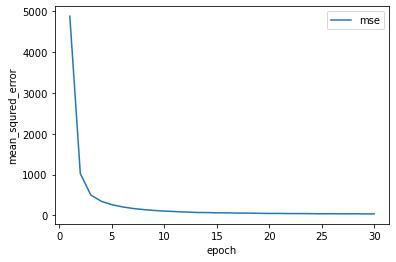

In [47]:
# MSE 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, mse, label='mse')
plt.xlabel('epoch')
plt.ylabel('mean_squred_error')
plt.legend()
plt.show()

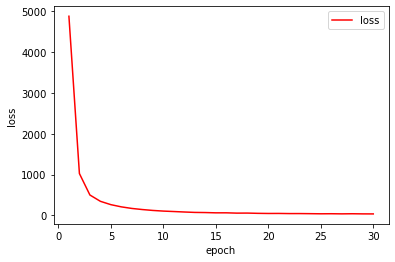

In [48]:
# 손실 학습 그래프
import matplotlib.pyplot as plt
plt.plot(epoch, loss, 'r', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()